In [1]:
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
style.use("fivethirtyeight")
%matplotlib inline  

# Meet the Data

The Iris dataset is a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the load_iris function

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

The value of the key DESCR is a short description of the dataset.

The value of the key target_names is an array of strings, containing the species of
flower that we want to predict:

In [4]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value of feature_names is a list of strings, giving the description of each feature:

In [5]:
print("Feature names: {}".format(iris_dataset["feature_names"]))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The **data** itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:

In [6]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris_dataset['data'].shape

(150, 4)

The target array contains the species of each of the flowers that were measured, also as a NumPy array:

In [8]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**target** is a one-dimensional array, with one entry per flower. The species are encoded as integers from 0 to 2. The meanings of the numbers are given by the iris['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica.

# Measuring Success: Training and Testing Data

One part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set.

scikit-learn contains a function that shuffles the dataset and splits it for you: the *train_test_split* function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set.

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics, where x is the input to a function and y is the output. Following more conventions from mathematics, we use a capital X because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector).

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [10]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [11]:
X_test.shape, y_test.shape

((38, 4), (38,))

# First Things First: Look at Your Data

Before building a machine learning model it is often a good idea to inspect the data, to see if the task is easily solvable without machine learning, or if the desired infor‐ mation might not be contained in the data.


One of the best ways to inspect data is to visualize it. One way to do this is by using a scatter plot. Unfortunately, computer screens have only two dimensions, which allows us to plot only two (or maybe three) features at a time. It is difficult to plot datasets with more than three features this way. One way around this problem is to do a pair plot, which looks at all possible pairs of features. If you have a small number of features, such as the four we have here, this is quite reasonable. You should keep in mind, however, that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.

To create the plot, we first convert the NumPy array into a pandas DataFrame. pandas has a function to create pair plots called scatter_matrix. The diagonal of this matrix is filled with histograms of each feature:

In [12]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame(data=X_train, columns=iris_dataset['feature_names'])

In [13]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


/Users/apple/.conda/envs/Machine Learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


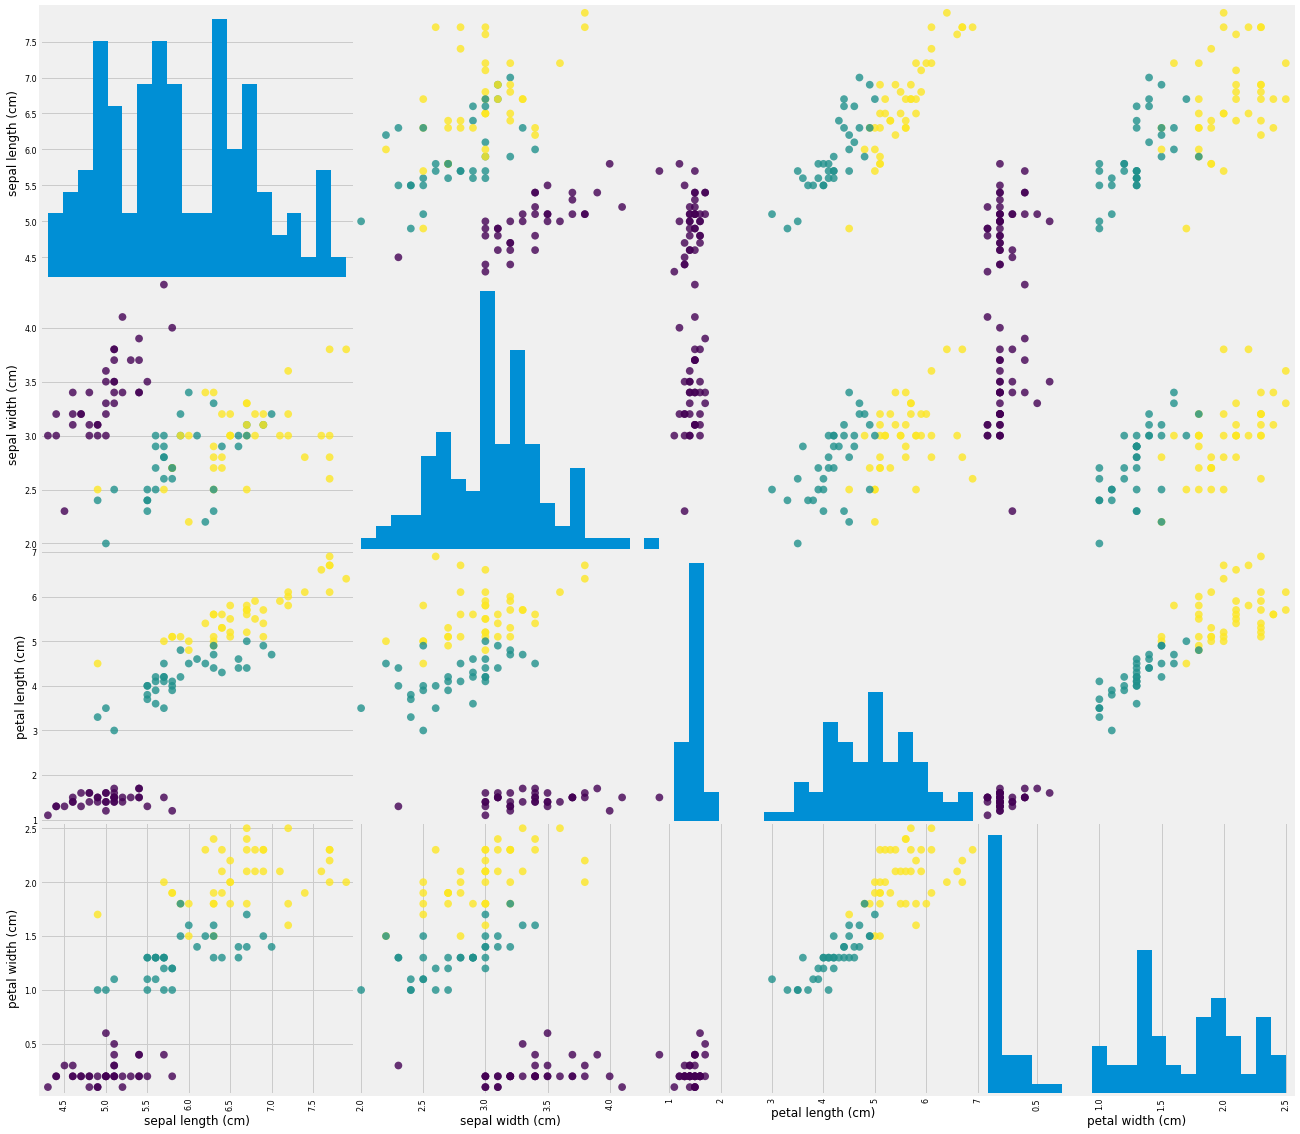

In [14]:
# create a scatter matrix from the dataframe, color by y_train
matrix = pd.scatter_matrix(frame=iris_dataframe, figsize=(20, 20),
                           marker='o', s=60, alpha=.8, c=y_train,
                           hist_kwds={'bins': 20}, grid=True)

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

# Building Your First Model: k-Nearest Neighbors

There are many classification algorithms in scikit-learn that we could use. Here we will use a **k-nearest neighbors** classifier.

To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the train‐ ing (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Making Predictions

Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm. What species of iris would this be?

Note that we made the measurements of this single flower into a row in a two- dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

In [17]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
prediction

array([0])

In [18]:
print('Predicted target name :{}'.format(iris_dataset['target_names'][prediction]))

Predicted target name :['setosa']


# Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set.

Therefore, we can make a prediction for each iris in the test data and compare it against its label (the known species). We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the right species was predicted:

In [19]:
y_pred = knn.predict(X_test)

In [20]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [26]:
# The accuracy is:
accuracy = knn.score(X_test, y_test)
accuracy

0.9736842105263158

In [28]:
# or:
np.mean(y_pred == y_test)

0.9736842105263158